# グラムシュミット法によってマハラノビス距離を計算する関数を作成する

In [1]:
import pandas as pd
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import chi2
import matplotlib.dates as mdates
import random
from sklearn.model_selection import train_test_split

In [2]:
df_l8 = np.array([
        [1,1,1,1,1,1,1],
        [1,1,1,2,2,2,2],
        [1,2,2,1,1,2,2],
        [1,2,2,2,2,1,1],
        [2,1,2,1,2,1,2],
        [2,1,2,2,1,2,1],
        [2,2,1,1,2,2,1],
        [2,2,1,2,1,1,2]
        ])
df_l8==1

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False, False, False],
       [ True, False, False,  True,  True, False, False],
       [ True, False, False, False, False,  True,  True],
       [False,  True, False,  True, False,  True, False],
       [False,  True, False, False,  True, False,  True],
       [False, False,  True,  True, False, False,  True],
       [False, False,  True, False,  True,  True, False]])

## データの取得

In [3]:
df = pd.read_csv('../data/letter_recognition.csv', header=None)

#Aのみを判定するため，Aを１，A以外を0にした．
df[0] = df[0].apply(lambda x: 1 if x == 'A' else 0)

#Xとyを入力
X = df[range(1,17)]
y = df[0]



In [4]:
#バギング側の話
#ブートストラップサンプリングの個数
n = 10
seed = random.randint(0, n)

#使用する7つの変数をランダムに取得する
random.seed(1)
random_s = random.sample(list(X.columns), 7)
use_X = X[random_s]

X_train, X_test, y_train, y_test = train_test_split(use_X, y, test_size=0.2)


In [5]:
normal_idx = y_train[y_train == 0].index.to_list()
anomaly_idx = y_train[y_train == 1].index.to_list()

#通常状態の説明変数と目的変数を定義
normal_X = X_train.loc[normal_idx]
normal_y = y_train.loc[normal_idx]
anomaly_X = X_train.loc[anomaly_idx]
anomaly_y = y_train.loc[anomaly_idx]

In [6]:
#各説明変数ごとに標準化
def transform_standard(fit_X, transform_X):
    scaler = StandardScaler()
    scaler.fit(fit_X)
    return scaler.transform(transform_X)

#共分散行列の逆行列
def inv_cov(x):
    #標準化後のベクトルを入力する
    #標準化した後なので相関行列と分散共分散行列は一致する
    cov = np.cov(x.T)
    return np.linalg.inv(cov)

#マハラノビス汎距離
def cal_MD(Z, inv_C, k):
    MD = []
    for i in range(len(Z)):
        _a = np.dot(Z[i], inv_C)
        _MD = np.dot(_a, Z[i].T)
        _MD = _MD / k
        MD.append(_MD)
    return MD


In [7]:
#標準化
normal_Z = transform_standard(normal_X, normal_X)
anomaly_Z = transform_standard(normal_X, anomaly_X) #異常データも正常データの平均と分散で標準化

#共分散行列の逆行列
inv_C = inv_cov(normal_Z)

#マハラノビス距離の計算
normal_MD = cal_MD(normal_Z, inv_C, len(use_X.columns))
anomaly_MD = cal_MD(anomaly_Z, inv_C, len(use_X.columns))


In [8]:
normal_X.head()

,5,10,14,13,2,16,12
13610,7,7,7,1,11,9,7
10201,3,13,10,1,7,7,5
9091,2,6,7,1,9,8,13
16985,8,7,8,7,8,2,6
7182,1,6,8,1,1,8,8


In [9]:
pd.DataFrame(normal_Z, index=normal_X.index, columns=normal_X.columns).head()

,5,10,14,13,2,16,12
13610,1.574610,-0.518194,-0.939913,-0.871673,1.193460,0.735566,-0.429578
10201,-0.240601,1.868095,1.047403,-0.871673,-0.010734,-0.497195,-1.377413
9091,-0.694404,-0.915909,-0.939913,-0.871673,0.591363,0.119186,2.413926
16985,2.028413,-0.518194,-0.277474,1.664633,0.290315,-3.579099,-0.903496
7182,-1.148207,-0.915909,-0.277474,-0.871673,-1.817024,0.119186,0.044339


In [10]:
pd.DataFrame(inv_C, index=normal_X.columns, columns=normal_X.columns)

,5,10,14,13,2,16,12
5,2.253337,0.134523,0.007024,-1.121753,-0.963289,0.032512,0.062932
10,0.134523,1.122552,0.018672,0.205015,-0.302033,0.128654,0.104430
14,0.007024,0.018672,1.056092,0.014918,-0.003124,0.173392,0.137573
13,-1.121753,0.205015,0.014918,1.708629,0.124304,0.061462,-0.004062
2,-0.963289,-0.302033,-0.003124,0.124304,1.548559,-0.004494,-0.043562
16,0.032512,0.128654,0.173392,0.061462,-0.004494,1.110525,-0.225767
12,0.062932,0.104430,0.137573,-0.004062,-0.043562,-0.225767,1.092020


In [11]:
# pd.DataFrame(gram_vec, index=normal_X.index, columns=normal_X.columns).head()

NameError: name 'gram_vec' is not defined

In [13]:
normal_MD

[1.514782038349722,
 0.8674954624652121,
 1.3942880297130316,
 2.660391569879053,
 0.585984417102108,
 1.3999213383218883,
 0.8910916938214359,
 1.236831702729578,
 0.7293965967513765,
 1.983142511767537,
 0.7695347595560504,
 0.9125023253940111,
 1.189818075847877,
 1.554403442624838,
 3.1120436108191996,
 0.731873116222752,
 1.8561260860766087,
 0.5153970447087836,
 1.9111455351061053,
 0.30372370698159273,
 1.5749808955103404,
 0.570347490377321,
 1.046154044843274,
 2.25865739948648,
 0.707175151413704,
 0.5498244747123342,
 1.7976935477863059,
 0.6156173083840876,
 1.656808109317631,
 1.1694128655664549,
 0.5474694236349962,
 0.8936777138845867,
 0.5102346925345789,
 1.9208398752045908,
 0.04740351935910801,
 1.0212129747273768,
 2.367349649944944,
 0.9977016281510487,
 1.1575864126926942,
 0.8817329637418557,
 1.4882327443607595,
 0.8902491894322103,
 1.0796132351746588,
 1.8134426492129008,
 1.7259087630284105,
 0.45534965975354746,
 0.31767518188678145,
 0.8347523678311147,
 0.

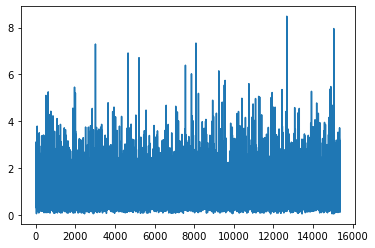

In [14]:
plt.plot(normal_MD)

In [15]:
gram_vec, r = np.linalg.qr(normal_Z)
ips = np.diag(np.cov(gram_vec.T))
gram_vec

array([[-1.27009459e-02,  3.24726061e-03, -7.54395034e-03, ...,
         2.42434220e-03,  4.04865652e-03,  5.92782213e-03],
       [ 1.94071007e-03, -1.49655400e-02,  8.11990310e-03, ...,
        -2.86801712e-03, -7.86115954e-04,  8.21200932e-03],
       [ 5.60112407e-03,  7.82451589e-03, -7.39302982e-03, ...,
         1.12790084e-02, -2.29109882e-03, -1.78947873e-02],
       ...,
       [-5.38011794e-03, -5.85913971e-03,  2.96030408e-03, ...,
         1.31221561e-04,  1.26109308e-02, -1.10942369e-02],
       [-1.71970394e-03, -1.52376204e-02,  8.10415573e-03, ...,
         3.70826490e-03, -5.19499324e-04, -3.67590320e-03],
       [-1.71970394e-03,  4.06350158e-03, -2.15205285e-03, ...,
        -6.51089951e-03,  7.29224274e-05,  2.35867981e-04]])

In [16]:
ips[0]

6.506604203266319e-05

In [17]:
gram_vec[0][0]**2 / ips[0]

2.4792352955774675

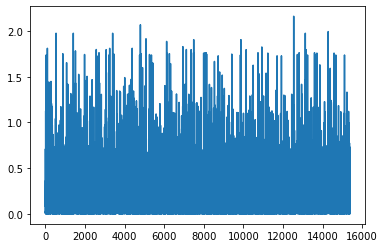

In [18]:
MD = []
k = gram_vec.shape[1]
for one_vec in gram_vec:
    _MD = 0
    for i, value in enumerate(one_vec):
        _MD += (value**2) / (ips[i])
        _MD = _MD / k
    MD.append(_MD)
plt.plot(MD)
        


## 一つのデータでそれぞれのマハラノビス距離を計算する

In [19]:
_a = np.dot(normal_Z[0], inv_C)
_MD = np.dot(_a, normal_Z[0].T)
_MD / 7

1.514782038349722

In [20]:
normal_Z[0]

array([ 1.57460999, -0.51819372, -0.93991331, -0.87167294,  1.19345978,
        0.73556646, -0.42957824])

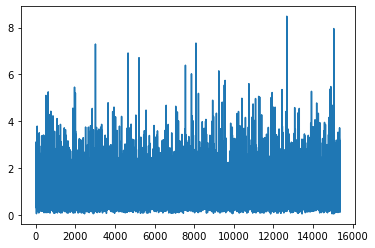

In [21]:
MD = []
k = 7
for one_Z in normal_Z:
    _a = np.dot(one_Z, inv_C)
    _MD = np.dot(_a, one_Z.T)
    _MD = _MD / k
    MD.append(_MD)
plt.plot(MD)

In [22]:
MD[0]

1.514782038349722

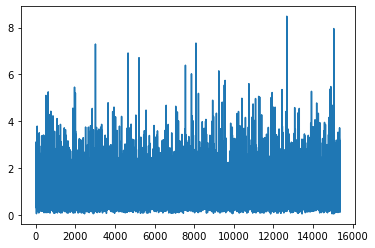

In [23]:
gram_MD = []
k = 7
for one_gram_vec in gram_vec:
    _gram_MD = 0
    for i, u in enumerate(one_gram_vec):
        _gram_MD += u**2 / ips[i]
    _gram_MD = _gram_MD / 7
    gram_MD.append(_gram_MD)
plt.plot(gram_MD)


In [24]:
gram_MD[0]

1.5147820383497237

In [25]:
pd.DataFrame([MD, gram_MD]).T.corr()

,0,1
0,1.0,1.0
1,1.0,1.0


In [26]:
#マハラノビス汎距離
def cal_MD(Z, inv_C):
    '''
    Z:標準化したベクトル
    inv_C:標準化後の共分散行列
    '''
    MD = np.zeros(len(Z))
    for i in range(len(Z)):
        _a = np.dot(Z[i], inv_C)
        _MD = np.dot(_a, Z[i].T)
        _MD = _MD / Z.shape[1]
        MD[i] = _MD
    return MD
cal_MD(normal_Z, inv_C)

array([1.51478204, 0.86749546, 1.39428803, ..., 0.92196091, 0.74811964,
       0.15848388])

In [27]:
#グラムシュミット法によるマハラノビス汎距離
normal_gram_vec, _ = np.linalg.qr(normal_Z)
normal_ips = np.diag(np.cov(normal_gram_vec.T))
def gram_schmidt_cal_MD(gram_vec, ips):
    '''
    Z:標準化したベクトル
    '''
    
    k = gram_vec.shape[1]
    MD = np.zeros(gram_vec.shape[0])
    
    for i, one_gram_vec in enumerate(gram_vec):
        _MD = 0
        for q, u in enumerate(one_gram_vec):
            _MD += u**2 / ips[q]
        _MD = _MD / k
        MD[i] = _MD
    return MD

gram_schmidt_cal_MD(normal_gram_vec, normal_ips)

array([1.51478204, 0.86749546, 1.39428803, ..., 0.92196091, 0.74811964,
       0.15848388])

In [28]:
a = np.cov(normal_gram_vec.T)

In [29]:
np.cov(np.array([[1, 2],[3, 4]]).T)

array([[2., 2.],
       [2., 2.]])

In [30]:
normal_ips

array([6.5066042e-05, 6.5066042e-05, 6.5066042e-05, 6.5066042e-05,
       6.5066042e-05, 6.5066042e-05, 6.5066042e-05])

In [31]:
%%time
cal_MD(normal_Z, inv_C)

Wall time: 63.9 ms


array([1.51478204, 0.86749546, 1.39428803, ..., 0.92196091, 0.74811964,
       0.15848388])

In [32]:
%%time
gram_schmidt_cal_MD(normal_gram_vec, normal_ips)

Wall time: 90.4 ms


array([1.51478204, 0.86749546, 1.39428803, ..., 0.92196091, 0.74811964,
       0.15848388])

In [33]:
cal_MD(anomaly_Z, inv_C)

array([1.08171861, 0.53115477, 0.72957484, 0.47616204, 0.53106607,
       1.64240617, 2.8906824 , 0.84612658, 0.65718564, 0.43985869,
       0.28346085, 1.11257458, 3.56327055, 1.23203515, 0.85958404,
       1.93249178, 0.5655132 , 0.39404328, 0.73895034, 0.51387475,
       1.75884369, 1.95215696, 1.3321282 , 0.43139786, 0.2776436 ,
       0.65577065, 1.73103007, 0.8679595 , 0.78121464, 1.11257458,
       0.57301323, 0.86545576, 0.2446426 , 3.30111031, 1.37529611,
       0.80789806, 0.72101043, 0.71416635, 0.75212591, 0.91699982,
       0.80272817, 0.84011723, 3.86466916, 0.95489512, 0.47579364,
       1.12248251, 0.53935591, 0.33563561, 2.20508623, 0.81796047,
       1.40915859, 0.51041853, 0.90316744, 0.39746016, 0.38637181,
       0.65292592, 0.82426547, 0.70469727, 1.13272465, 1.24785648,
       0.67551467, 0.55454401, 0.78196538, 1.27552147, 1.26203929,
       2.38547453, 0.43071787, 0.69123774, 0.99697126, 1.07844957,
       0.22730374, 0.5465293 , 0.29787906, 1.26974278, 3.47250

In [34]:
gram_schmidt_cal_MD(normal_gram_vec, normal_ips)


array([1.51478204, 0.86749546, 1.39428803, ..., 0.92196091, 0.74811964,
       0.15848388])

In [35]:
MD = []
for i in range(len(anomaly_X)):
    sample = normal_X.reset_index(drop=True)
    sample = sample.append(anomaly_X.iloc[i]).reset_index(drop=True)
    sample_Z = transform_standard(normal_X, sample)
    anomaly_gram_vec, _ = np.linalg.qr(sample_Z)
    anomaly_ips = np.diag(np.cov(anomaly_gram_vec.T))
    MD.append(gram_schmidt_cal_MD(anomaly_gram_vec, anomaly_ips)[-1])
pd.DataFrame(MD)


,0
0,1.081256
1,0.531061
2,0.729380
3,0.476090
4,0.530972
...,...
625,0.344481
626,0.312420
627,0.991415
628,0.274265


In [36]:
sample_Z = transform_standard(normal_X, anomaly_X)
anomaly_gram_vec, _ = np.linalg.qr(sample_Z)
anomaly_ips = np.diag(np.cov(anomaly_gram_vec.T))
pd.DataFrame(gram_schmidt_cal_MD(anomaly_gram_vec, anomaly_ips))


,0
0,2.132031
1,0.691949
2,0.572013
3,0.692372
4,0.720792
...,...
625,0.286039
626,0.655564
627,1.240129
628,0.299122


In [37]:
sample_Z = transform_standard(normal_X, X_train)
anomaly_gram_vec, _ = np.linalg.qr(sample_Z)
pd.DataFrame(gram_schmidt_cal_MD(anomaly_gram_vec, normal_ips), index=X_train.index).loc[anomaly_idx]


,0
19286,1.039335
17171,0.482330
13398,0.661889
3001,0.436196
8961,0.482282
...,...
813,0.314914
10203,0.295168
10961,0.933292
7582,0.253768


In [38]:
sample_Z = transform_standard(normal_X, X_train)
anomaly_gram_vec, _ = np.linalg.qr(sample_Z)
anomaly_ips = np.diag(np.cov(anomaly_gram_vec.T))
pd.DataFrame(gram_schmidt_cal_MD(anomaly_gram_vec, anomaly_ips), index=X_train.index).loc[anomaly_idx]


,0
19286,1.082297
17171,0.503114
13398,0.690019
3001,0.455072
8961,0.503041
...,...
813,0.328184
10203,0.307626
10961,0.972569
7582,0.264497


In [39]:
pd.DataFrame(cal_MD(anomaly_Z, inv_C), index=anomaly_idx)

,0
19286,1.081719
17171,0.531155
13398,0.729575
3001,0.476162
8961,0.531066
...,...
813,0.344513
10203,0.312444
10961,0.991798
7582,0.274281


## 異常データでの逆行列MDとGramschmidtMDの比較

In [ ]:
conpare_df = pd.DataFrame(cal_MD(anomaly_Z, inv_C), index=anomaly_idx, columns=['InvMD'])
conpare_df

,InvMD
19620,2.277088
10569,0.780341
4225,1.086459
13702,0.742296
19597,4.860878
...,...
18377,0.905111
19888,0.513390
3025,0.703537
9063,1.104459


In [ ]:
def create_gramMD_one_by_one():
    MD = []
    for i in range(len(anomaly_X)):
        sample = normal_X.reset_index(drop=True)
        sample = sample.append(anomaly_X.iloc[i]).reset_index(drop=True)
        sample_Z = transform_standard(normal_X, sample)
        anomaly_gram_vec, _ = np.linalg.qr(sample_Z)
        anomaly_ips = np.diag(np.cov(anomaly_gram_vec.T))
        MD.append(gram_schmidt_cal_MD(anomaly_gram_vec, anomaly_ips)[-1])
    return pd.DataFrame(MD, index=anomaly_idx, columns=['gramMD_one_by_one'])
conpare_df = pd.concat([conpare_df, create_gramMD_one_by_one()], axis=1)
conpare_df


In [ ]:
conpare_df = conpare_df[['InvMD', 'gramMD_one_by_one']]

In [ ]:
def create_gramMD_anomaly_only():
    sample_Z = transform_standard(normal_X, anomaly_X)
    anomaly_gram_vec, _ = np.linalg.qr(sample_Z)
    anomaly_ips = np.diag(np.cov(anomaly_gram_vec.T))
    return pd.DataFrame(gram_schmidt_cal_MD(anomaly_gram_vec, anomaly_ips), index=anomaly_idx, columns=['gramMD_anomaly_only'])
    
conpare_df = pd.concat([conpare_df, create_gramMD_anomaly_only()], axis=1)
conpare_df

,InvMD,gramMD_one_by_one,gramMD_anomaly_only
19620,2.277088,2.274877,2.795716
10569,0.780341,0.780115,2.797163
4225,1.086459,1.085993,0.947095
13702,0.742296,0.742094,0.751413
19597,4.860878,4.850460,8.147387
...,...,...,...
18377,0.905111,0.904798,1.588327
19888,0.513390,0.513304,0.854800
3025,0.703537,0.703358,0.883006
9063,1.104459,1.103976,0.850638


In [ ]:
def create_gramMD_all_sample():
    sample_Z = transform_standard(normal_X, X_train)
    anomaly_gram_vec, _ = np.linalg.qr(sample_Z)
    anomaly_ips = np.diag(np.cov(anomaly_gram_vec.T))
    return pd.DataFrame(gram_schmidt_cal_MD(anomaly_gram_vec, anomaly_ips), index=X_train.index, columns=['gramMD_all_sample']).loc[anomaly_idx]

conpare_df = pd.concat([conpare_df, create_gramMD_all_sample()], axis=1)
conpare_df

,InvMD,gramMD_one_by_one,gramMD_anomaly_only,gramMD_all_sample
19620,2.277088,2.274877,2.795716,2.186991
10569,0.780341,0.780115,2.797163,0.791389
4225,1.086459,1.085993,0.947095,1.057798
13702,0.742296,0.742094,0.751413,0.730570
19597,4.860878,4.850460,8.147387,4.663684
...,...,...,...,...
18377,0.905111,0.904798,1.588327,0.884619
19888,0.513390,0.513304,0.854800,0.506159
3025,0.703537,0.703358,0.883006,0.674589
9063,1.104459,1.103976,0.850638,1.053029


## やったこと
- 今までの逆行列MDとグラムシュミットMDが異常データにおいてどのくらい差があるかを検証した．
    - gramMD_one_by_one: 通常データに異常データを一つだけくっつけて直交化を行いGramschmidtMDを求める方法 
    - gramMD_anomaly_only: 異常データだけで直交化を行いGramschmidtMDを求める方法 
    - gramMD_all_sample: 通常データに異常データをすべてくっつけて直交化を行いGramschmidtMDを求める方法

## 結果

In [ ]:
conpare_df

,InvMD,gramMD_one_by_one,gramMD_anomaly_only,gramMD_all_sample
19620,2.277088,2.274877,2.795716,2.186991
10569,0.780341,0.780115,2.797163,0.791389
4225,1.086459,1.085993,0.947095,1.057798
13702,0.742296,0.742094,0.751413,0.730570
19597,4.860878,4.850460,8.147387,4.663684
...,...,...,...,...
18377,0.905111,0.904798,1.588327,0.884619
19888,0.513390,0.513304,0.854800,0.506159
3025,0.703537,0.703358,0.883006,0.674589
9063,1.104459,1.103976,0.850638,1.053029


#### RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
print('gramMD_one_by_one:', np.sqrt(mean_squared_error(conpare_df['InvMD'], conpare_df['gramMD_one_by_one'])))
print('gramMD_anomaly_only:', np.sqrt(mean_squared_error(conpare_df['InvMD'], conpare_df['gramMD_anomaly_only'])))
print('gramMD_all_sample:', np.sqrt(mean_squared_error(conpare_df['InvMD'], conpare_df['gramMD_all_sample'])))

gramMD_one_by_one: 0.0012169326516005816
gramMD_anomaly_only: 0.6993212728913734
gramMD_all_sample: 0.039443899340899154


#### 計算時間

In [ ]:
print('gramMD_one_by_one:', '1m 03s')
print('gramMD_anomaly_only:', '0.8s')
print('gramMD_all_sample:', '0.1s')

gramMD_one_by_one: 1m 03s
gramMD_anomaly_only: 0.8s
gramMD_all_sample: 0.1s


In [ ]:
len(X_train)

16000

In [ ]:
len(X_test)

4000

# できた！！！！！

In [ ]:
#L8直行表
l8 = np.array([
    [1,1,1,1,1,1,1],
    [1,1,1,2,2,2,2],
    [1,2,2,1,1,2,2],
    [1,2,2,2,2,1,1],
    [2,1,2,1,2,1,2],
    [2,1,2,2,1,2,1],
    [2,2,1,1,2,2,1],
    [2,2,1,2,1,1,2]
    ])
l8 = (l8 == 1)
l8

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True, False, False, False, False],
       [ True, False, False,  True,  True, False, False],
       [ True, False, False, False, False,  True,  True],
       [False,  True, False,  True, False,  True, False],
       [False,  True, False, False,  True, False,  True],
       [False, False,  True,  True, False, False,  True],
       [False, False,  True, False,  True,  True, False]])

In [ ]:
#異常データのマハラノビス距離
result = np.zeros((l8.shape[0], anomaly_Z.shape[0]))
for i, l8_row in enumerate(l8):
    result[i] = cal_MD(anomaly_Z[:, l8_row], inv_C[l8_row][:,l8_row])
result


array([[0.54897735, 0.80594764, 0.25822561, ..., 0.81127319, 1.34173595,
        1.12818194],
       [0.81414475, 1.66691331, 0.81414475, ..., 1.17608226, 0.72392134,
        3.02201274],
       [0.78876927, 0.34304566, 0.16598893, ..., 0.3258575 , 0.24768548,
        1.7340828 ],
       ...,
       [0.33831351, 0.30805763, 0.11758412, ..., 1.10111187, 0.24692022,
        2.20757785],
       [0.31521762, 0.9182262 , 0.43578507, ..., 0.37073917, 0.74006328,
        1.04321135],
       [0.48867644, 1.11251288, 0.36091576, ..., 1.24554322, 2.67686101,
        3.2350077 ]])

In [ ]:
#異常データのマハラノビス距離
result = np.zeros((l8.shape[0], anomaly_Z.shape[0]))

for i, l8_row in enumerate(l8):
    _gram_vec, _ = np.linalg.qr(anomaly_Z[:, l8_row])
    result[i] = gram_schmidt_cal_MD(_gram_vec, normal_ips[l8_row])
result


array([[16.39907068, 13.18763491,  6.47958334, ..., 18.24982226,
        50.79338466, 21.38352322],
       [ 9.43740552, 20.90304841,  9.43740552, ..., 37.0755016 ,
        16.4307721 , 32.49439143],
       [24.94408966, 12.37357899,  7.20399173, ...,  8.50702906,
        18.3343913 , 43.59116868],
       ...,
       [ 9.66673412, 16.73425211,  5.76037926, ..., 34.17653701,
        16.73557682, 39.58413969],
       [ 3.65433844, 11.4164381 ,  6.70474677, ...,  5.4139151 ,
        21.75214394, 12.53635637],
       [ 4.86159423, 10.49390799,  3.72307593, ..., 22.83763947,
        58.70907407, 45.4223399 ]])

In [ ]:
 #SN比
sn = np.zeros(l8.shape[0])
for idx, row in enumerate(result):
    sum_MD = 0
    for i in range(len(row)):
        sum_MD += 1 / row[i]
    sn[idx] = -10 * math.log10(sum_MD / len(row))
sn

array([11.87847325, 11.75508921, 10.78825781,  8.59781842,  9.72059755,
        9.9537332 ,  9.3703629 , 10.79446388])

In [ ]:
X_train

,5,10,14,13,2,16,12
9877,1,7,7,2,0,9,8
8430,4,6,8,2,7,8,6
322,5,11,6,4,10,9,7
14003,3,14,9,2,10,11,6
3407,3,12,9,2,13,6,5
...,...,...,...,...,...,...,...
450,2,10,9,5,4,7,6
18925,0,7,10,3,0,8,8
5789,8,6,8,8,8,6,8
1555,1,7,8,2,3,8,7


In [ ]:
# SN比を利用し，不要と思われる変数を削除する
#変数選択
df_sn = pd.DataFrame(index=X_train.columns, columns=['SN比'])
for i, clm in enumerate(X_train.columns):
    df_sn.loc[df_sn.index == clm, 'SN比'] = sum(sn[l8.T[i]]) - sum(sn[~l8.T[i]])
#使用した変数を保存
select_columns = df_sn[df_sn['SN比'] > 0].index
df_sn
    

,SN比
5,3.180481
10,3.75699
14,4.737982
13,0.656587
2,3.97106
16,-0.87609
12,-3.258021


In [ ]:
df_sn.loc[select_columns]

,SN比
5,3.180481
10,3.75699
14,4.737982
13,0.656587
2,3.97106


In [ ]:
weight = (df_sn[df_sn['SN比'] > 0] / df_sn[df_sn['SN比'] > 0].sum()).values
weight

array([[0.19508443552654312],
       [0.23044636152888157],
       [0.2906184784888307],
       [0.040273739076915734],
       [0.24357698537882888]], dtype=object)

In [ ]:
weight[0] = weight[0] * 2 + 5

In [ ]:
weight

array([[5.390168871053087],
       [0.23044636152888157],
       [0.2906184784888307],
       [0.040273739076915734],
       [0.24357698537882888]], dtype=object)

In [ ]:
weight[0] * 2 + 5

array([15.780337742106173], dtype=object)

In [ ]:
select_columns

Int64Index([5, 10, 14, 13, 2], dtype='int64')

## このSN比を重みとして加重マハラノビス距離を計算する

In [ ]:
result_scaler = StandardScaler()
result_scaler.fit(X_train[select_columns][y == 0])
result_Z = result_scaler.transform(X_train[select_columns][y == 0])
result_Z

<ipython-input-46-3d78827ea5f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_scaler.fit(X_train[select_columns][y == 0])
<ipython-input-46-3d78827ea5f0>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_Z = result_scaler.transform(X_train[select_columns][y == 0])


array([[-1.14824355, -0.5155805 , -0.94884703, -0.44846422, -2.1298689 ],
       [ 0.21215746, -0.91363479, -0.28023823, -0.44846422, -0.01223632],
       [ 0.66562446,  1.07663663, -1.61745583,  0.39931897,  0.8953205 ],
       ...,
       [ 2.02602547, -0.91363479, -0.28023823,  2.09488534,  0.29028262],
       [-1.14824355, -0.5155805 , -0.28023823, -0.44846422, -1.22231208],
       [-1.14824355, -0.5155805 , -0.28023823, -1.29624741,  0.8953205 ]])

In [ ]:
weight

array([[5.390168871053087],
       [0.23044636152888157],
       [0.2906184784888307],
       [0.040273739076915734],
       [0.24357698537882888]], dtype=object)

In [ ]:
#グラムシュミット法による加重マハラノビス汎距離
def weighted_gram_schmidt_cal_MD(Z, weight, ips):
    '''
    Z:標準化したベクトル
    '''
    gram_vec, _ = np.linalg.qr(Z)
    k = gram_vec.shape[1]
    MD = np.zeros(len(Z))
    
    for i, one_gram_vec in enumerate(gram_vec):
        _MD = 0
        for q, u in enumerate(one_gram_vec):
            _MD += weight[q] * (u**2 / ips[q])
        _MD = _MD / k
        MD[i] = _MD
    return MD
Z = result_scaler.transform(X_test[select_columns])
MD = weighted_gram_schmidt_cal_MD(Z, weight, normal_ips)
MD

array([10.73647859,  2.90167245,  3.14508558, ...,  2.17492582,
        2.96060483,  2.60504555])

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test.values, weighted_gram_schmidt_cal_MD(Z, weight, normal_ips)))
print(roc_auc_score(y_test.values, gram_schmidt_cal_MD(Z, normal_ips)))

0.5420499930636176
0.5439766645492446


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
clf = LogisticRegression(solver="liblinear", random_state=0).fit(use_X, y)
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8606407757065982

In [ ]:
confusion_matrix(y_test, clf.predict(X_test))

array([[3847,   11],
       [ 136,    6]], dtype=int64)